# R for Drug Development

## Applied Pharmaceutical Bioinformatics - Exam Part 2
Thomas Dräbing

Monday, May 11, 2015
### [See orginal post](https://rstudio-pubs-static.s3.amazonaws.com/80001_cdc4b94496eb4b9bb7c9a22cc6e5ea9d.html)
### Results

In [3]:
set.seed(123) #To keep report consistent
load("exam.Rdata")

In [6]:
head(dataset)

,response,TopoPSA,nHBDon,nHBAcc,bpol,apol,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,⋯,nB,nAtom,nAromBond,naAromAtom,ALogP,ALogp2,AMR,BCUTw.1h,BCUTp.1l,BCUTp.1h
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-2.18,0,0,0,3.866414,13.57359,0,0,0,0,⋯,5,8,0,0,2.4441,5.973625,31.2668,34.97201,6.083246,10.718810
2,-2.00,0,0,0,4.539621,12.06038,0,0,0,0,⋯,4,8,0,0,2.0293,4.118058,26.2173,34.97106,6.568071,9.741319
3,-1.74,0,0,0,3.866414,13.57359,0,0,0,0,⋯,5,8,0,0,2.3992,5.756161,30.7638,34.97201,6.567986,9.741582
4,-1.48,0,0,0,4.539621,12.06038,0,0,0,0,⋯,4,8,0,0,1.9555,3.823980,25.7097,34.97106,5.594245,8.764015
5,-3.04,0,0,0,4.869000,11.73100,0,0,0,0,⋯,7,8,0,0,2.7863,7.763468,27.3736,34.97106,4.456000,8.582175
6,-1.29,0,0,0,5.212828,10.54717,0,0,0,0,⋯,3,8,0,0,1.5407,2.373756,20.6602,34.97015,5.588571,7.787019


In [4]:
#Download the .Rdata file from the following link
#http://pele.farmbio.uu.se/practicalpharmbio/resources/exam.Rdata and read it in R.
#(download.file repeatedly produced a broken file, thus a manual download was used.)
#set.seed(123) #To keep report consistent
#load("exam.Rdata")
#Clean the data set by removing variables with missing values and variance below 0.5.
dataset <- dataset[,colSums(is.na(dataset))==0]
dataset <- dataset[,sapply(dataset, var)>0.5]
#Split the resulting data set into training and validation sets, with the proportion of your choice.
require(caret)
inTrain <- createDataPartition(y = dataset$response, p = 0.6, list = F)
training <- dataset[inTrain,]
testing <- dataset[-inTrain,]
#Use Linear Regression to model the variable "response" as a function of XLogP.
model.LM.1 <- lm(response~XLogP, data = training)
#Use Linear Regression to model the variable "response" as a function of XLogP, TopoPSA, and MW.
model.LM.2 <- lm(response~XLogP+TopoPSA+MW, data = training)
#Use the method Random Forests to model the variable "response" as a function of all other variables (all except for "response").
require(randomForest)
model.RF <- randomForest(response~., data = training, importance = T)
#Make predictions on the validation set with each of the models and check how the predicted values correlate with the true values of the variable "response".
predict.LM.1 <- predict(model.LM.1, testing)
predict.LM.2 <- predict(model.LM.2, testing)
predict.RF <- predict(model.RF, testing)
cor.LM.1 <- cor(testing$response, predict.LM.1)
cor.LM.2 <- cor(testing$response, predict.LM.2)
cor.RF <- cor(testing$response, predict.RF)

Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




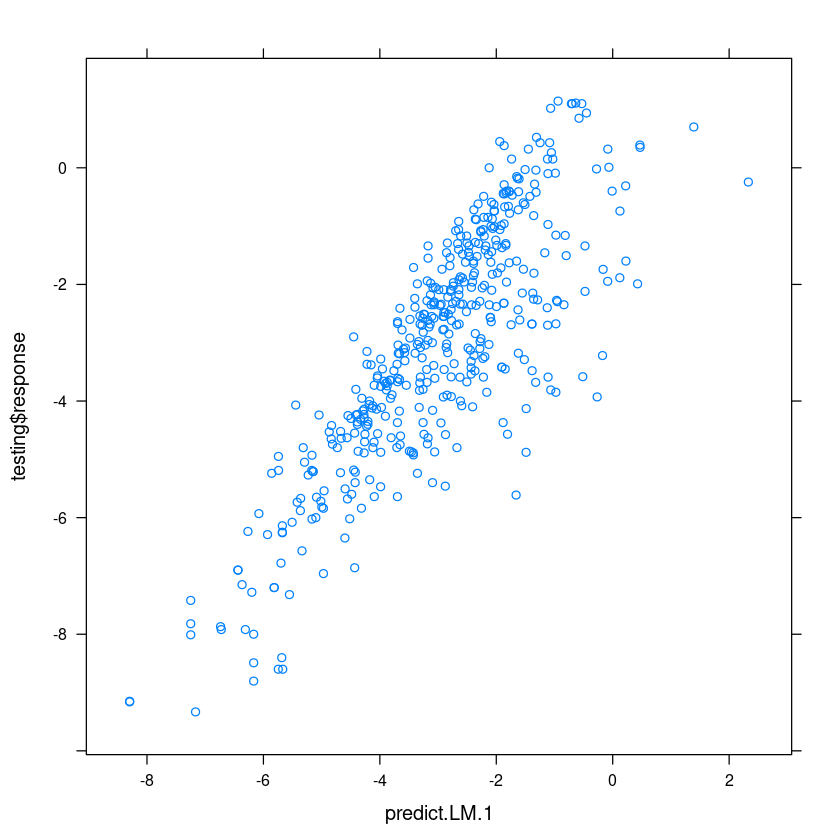

In [5]:
require(lattice)
xyplot(testing$response~predict.LM.1)

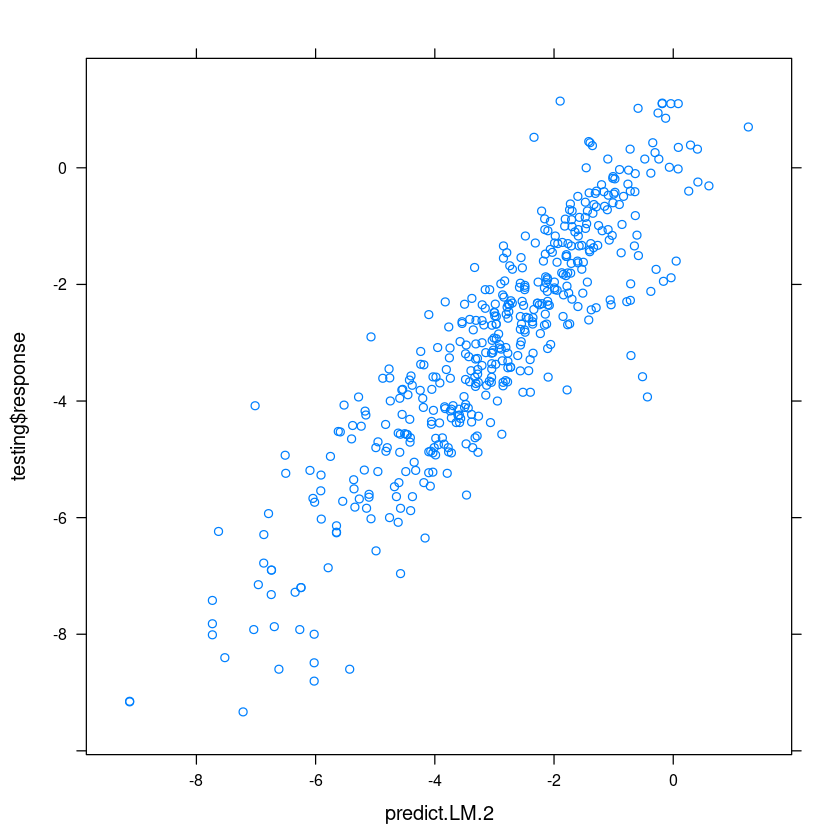

In [7]:
xyplot(testing$response~predict.LM.2)

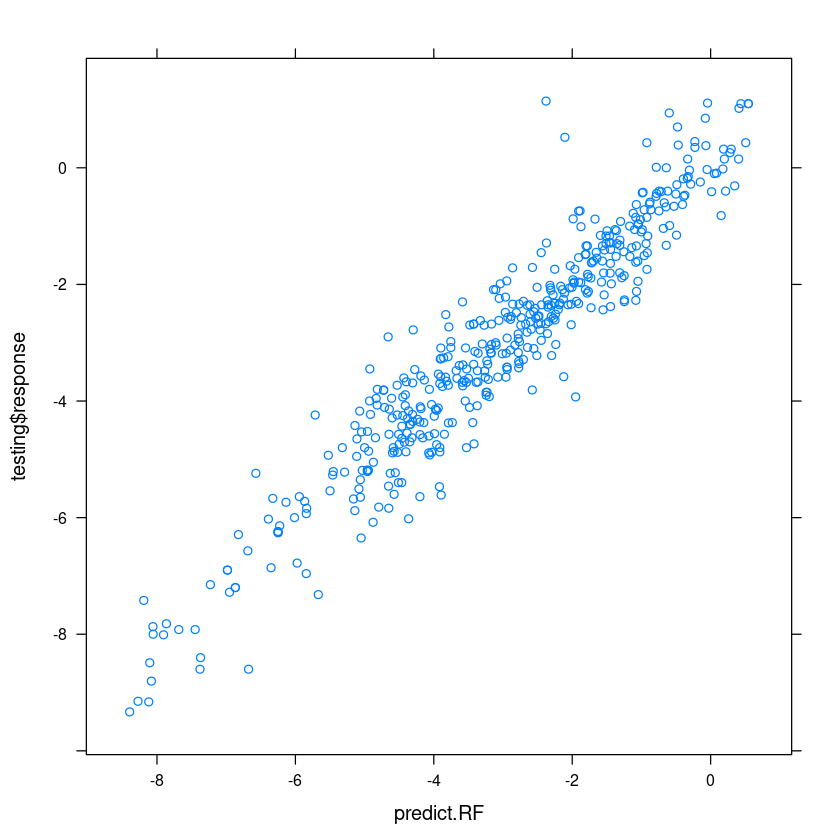

In [8]:
xyplot(testing$response~predict.RF)

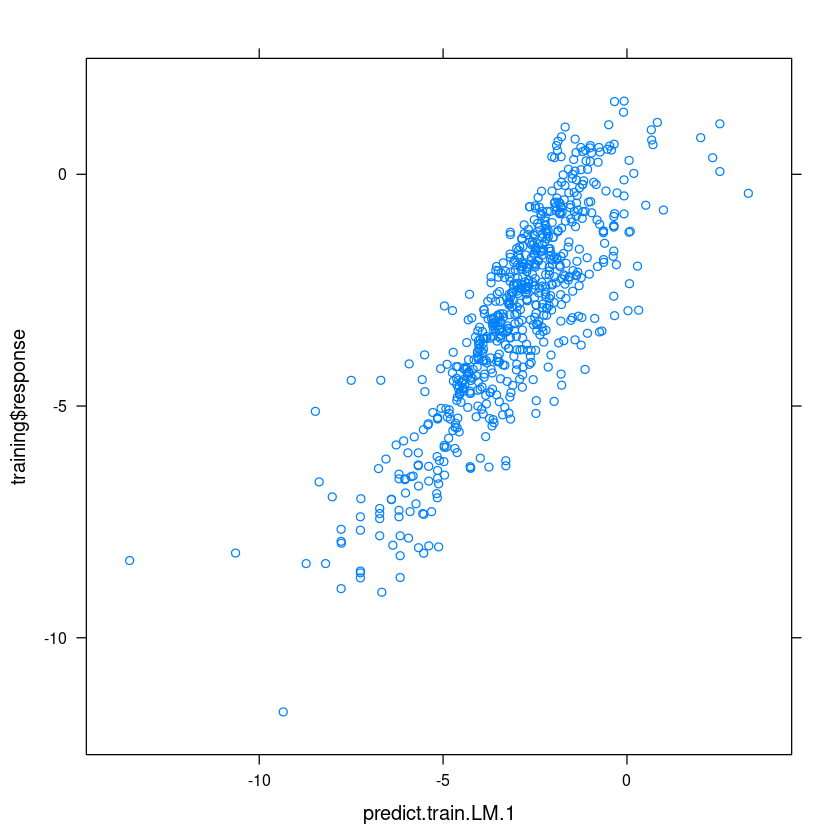

In [9]:
predict.train.LM.1 <- predict(model.LM.1, training)
predict.train.LM.2 <- predict(model.LM.2, training)
predict.train.RF <- predict(model.RF, training)
cor.train.LM.1 <- cor(training$response, predict.train.LM.1)
cor.train.LM.2 <- cor(training$response, predict.train.LM.2)
cor.train.RF <- cor(training$response, predict.train.RF)
xyplot(training$response~predict.train.LM.1)

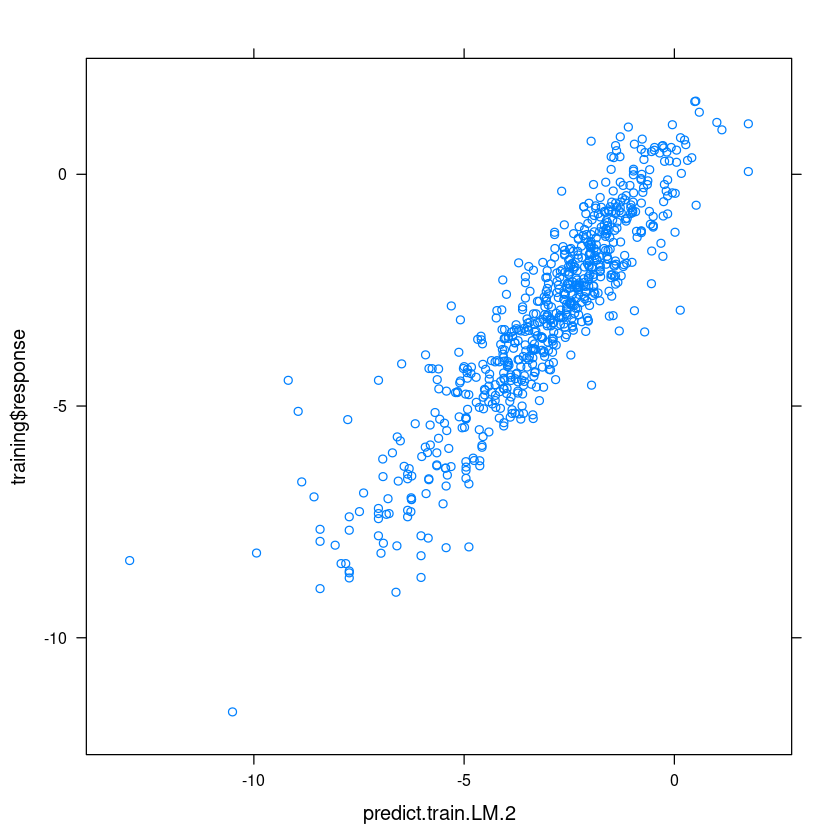

In [10]:
xyplot(training$response~predict.train.LM.2)

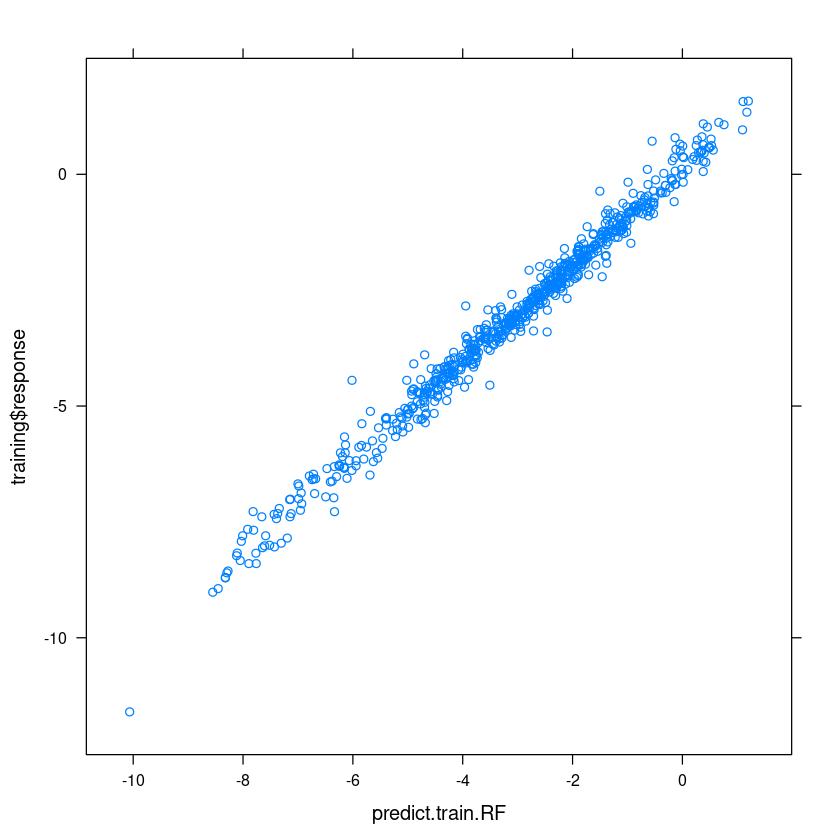

In [11]:
xyplot(training$response~predict.train.RF)